In [ ]:
# work with black and shite images of size 28x28=784 pixels. 
# try to predict what number is in the image based on the image data 
# in the form of an array

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# 1, read the data

In [82]:
mnist=input_data.read_data_sets("/tmp/data/",one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [10]:
mnist.train

In [12]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [8]:
mnist.train.images.shape

(55000, 784)

In [96]:
mnist.train.num_examples

55000

In [100]:
# take a look at one of the images

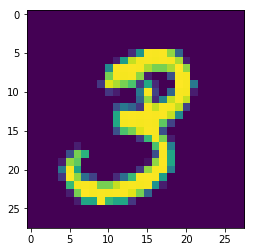

In [15]:
plt.imshow(mnist.train.images[1].reshape(28,28))

# 2, create the layers

In [102]:
# tensorflow graph input

In [83]:
n_hidden_1=256# 256 neurons is just a common number for each layer
n_hidden_2=256
n_input=784 # 28x28 which is the size of the picture
n_classes=10 # total classes
# x and y will be use in function 'add' later
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

# create 2 dictionaries contained the weight and bias objects for the model
weights={
    'w1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'w2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

biases={
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

# create the 2 layers
# relu= an activation function, which is a simple rectifier function which
# either returns x or zero
# use linear activation with matrix mul here
input_layer_1=tf.add(tf.matmul(x,weights['w1']), biases['b1'])
# RELU(x * w + b) -> f(x)=max(0,x)
hidden_layer_1=tf.nn.relu(input_layer_1)
    
input_layer_2=tf.add(tf.matmul(hidden_layer_1, weights['w2']), biases['b2'])
hidden_layer_2=tf.nn.relu(input_layer_2)
    
output_layer=tf.matmul(hidden_layer_2, weights['out']) + biases['out']
# could be lots and lots of hidden layer - deep learning

In [18]:
weights['out']

<tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>

In [19]:
print (tf.matmul(x,weights['w1']))

Tensor("MatMul:0", shape=(?, 256), dtype=float32)


# define loss and optimizer, and init.. the variables

In [84]:
# create the variables for cost and optimization functions
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost_function)

training_epochs = 15
batch_size = 100
n_samples = mnist.train.num_examples

#init must place before sess
init=tf.initialize_all_variables()

# lunch the session
sess=tf.InteractiveSession()
# intilialize all the variables
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


# reduce the cost

In [87]:
# Training Epochs
# Essentially the max amount of loops possible before we stop
# May stop earlier if cost/loss limit was set
for epoch in range(training_epochs):
    # Start with cost = 0.0
    avg_cost = 0.0
    # Convert total number of batches to integer
    total_batch = int(n_samples/batch_size)
    # Loop over all batches
    for i in range(20):
        # Grab the next batch of training data and labels
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Feed dictionary for optimization and loss value
        # Returns a tuple, but we only need 'c' the cost
        # So we set an underscore as a "throwaway"
        _, c = sess.run([optimizer, cost_function], feed_dict={x: batch_x, y: batch_y})
        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))
print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost=16.0044
Epoch: 2 cost=3.9316
Epoch: 3 cost=2.7457
Epoch: 4 cost=2.3563
Epoch: 5 cost=1.8845
Epoch: 6 cost=1.7689
Epoch: 7 cost=1.7469
Epoch: 8 cost=1.4724
Epoch: 9 cost=1.2770
Epoch: 10 cost=1.3586
Epoch: 11 cost=1.2873
Epoch: 12 cost=1.0480
Epoch: 13 cost=0.9204
Epoch: 14 cost=0.7920
Epoch: 15 cost=0.9406


Model has completed 15 Epochs of Training


# increase accuracy

In [91]:
tf.global_variables_initializer().run()
for i in range(2000):
    batch = mnist.train.next_batch(100)
    optimizer.run(feed_dict={x: batch[0], y: batch[1]})
    if ((i+1) % 100 == 0):
        accuracy_eval=accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels})  
        print("Training epoch " +str(i+1))
        print("Accuracy: " + str(accuracy_eval))

Training epoch 100
Accuracy: 0.8753
Training epoch 200
Accuracy: 0.9048
Training epoch 300
Accuracy: 0.9145
Training epoch 400
Accuracy: 0.9242
Training epoch 500
Accuracy: 0.9278
Training epoch 600
Accuracy: 0.9345
Training epoch 700
Accuracy: 0.934
Training epoch 800
Accuracy: 0.9369
Training epoch 900
Accuracy: 0.9462
Training epoch 1000
Accuracy: 0.9433
Training epoch 1100
Accuracy: 0.9369
Training epoch 1200
Accuracy: 0.9434
Training epoch 1300
Accuracy: 0.9428
Training epoch 1400
Accuracy: 0.9455
Training epoch 1500
Accuracy: 0.9496
Training epoch 1600
Accuracy: 0.9512
Training epoch 1700
Accuracy: 0.948
Training epoch 1800
Accuracy: 0.9468
Training epoch 1900
Accuracy: 0.9517
Training epoch 2000
Accuracy: 0.9513


# Check prediction accuracy

In [92]:
#a check of predictions == y_test
correct_predictions = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))

#In order to get a numerical value for our predictions we will 
#need to use tf.cast to cast the Tensor of booleans back into a Tensor 
#of Floating point values in order to take the mean of it.
correct_predictions = tf.cast(correct_predictions, "float")

accuracy = tf.reduce_mean(correct_predictions)

print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9513


# test prediction accuracy

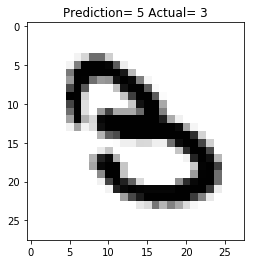

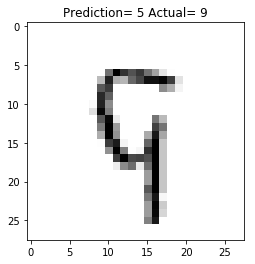

In [93]:

for i in range(100):
    x_train=mnist.test.images[i,:].reshape(1,784)
    y_train=mnist.test.labels[i,:]
    label=y_train.argmax()
    prediction=sess.run(output_layer,feed_dict={x:x_train}).argmax()
    if (prediction != label) :
        plt.title('Prediction= %d Actual= %d' % (prediction, label))
        plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()